<a href="https://colab.research.google.com/github/Smooj/Data-Science/blob/main/Stock_Price_Prediction_sp500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

In [ ]:
sp500=yf.Ticker("^GSPC") #sp500 index

In [ ]:
sp500 = sp500.history(period="max") # query all data from the begining of the index being created
sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


Columns that will be used to predict if the stock market will go up or down the next day:

*   Open - Price when the market opened
*   High - Highest price during the day
*   Low  - Lowest price during the day
*   Close - Price when the market closed
*   Volume - Total amount that was traded that day

Additional Columns:
*   Dividends - Profit company pays to its stock holders
*   Stock Splits - Additional shares issued to shareholders  



In [ ]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-07-22 00:00:00-04:00', '2024-07-23 00:00:00-04:00',
               '2024-07-24 00:00:00-04:00', '2024-07-25 00:00:00-04:00',
               '2024-07-26 00:00:00-04:00', '2024-07-29 00:00:00-04:00',
               '2024-07-30 00:00:00-04:00', '2024-07-31 00:00:00-04:00',
               '2024-08-01 00:00:00-04:00', '2024-08-02 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24263, freq=None)

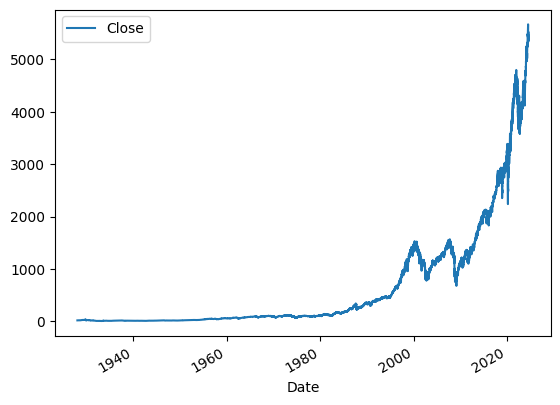

In [ ]:
sp500.plot.line(y="Close", use_index=True)
None

In [ ]:
sp500.drop(["Dividends", "Stock Splits"], inplace=True, axis=1)
sp500.head()

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0


Set up our target - what I will be predicting through machine learning

We don't care about predicting the actual price of tomorrow. What we want to predict is the direction in which the market will be tomorrow

We need to create a target class using our data. I will use the shift method to determine whether the price went up or down the next day.

In [ ]:
sp500["Tomorrow"] = sp500.Close.shift(-1) #take the price of the next day and put it on the row of the previous day
sp500.head()

,Open,High,Low,Close,Volume,Target,Tomorrow
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,17.500000


The target variable: Is tomorrow price greater than today's price (Closing)

In [ ]:
sp500["Target"] = (sp500["Tomorrow"]>sp500["Close"]).astype(int)
sp500.head()

,Open,High,Low,Close,Volume,Target,Tomorrow
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,1,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,1,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0,17.500000


In [ ]:
sp500 = sp500.loc["1990-01-01":]
sp500

,Open,High,Low,Close,Volume,Target,Tomorrow
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,0,358.760010
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,0,355.670013
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,0,352.200012
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,1,353.790009
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,0,349.619995
...,...,...,...,...,...,...,...
2024-07-29 00:00:00-04:00,5476.549805,5487.740234,5444.439941,5463.540039,3379970000,0,5436.439941
2024-07-30 00:00:00-04:00,5478.729980,5489.459961,5401.700195,5436.439941,3777740000,1,5522.299805
2024-07-31 00:00:00-04:00,5505.589844,5551.509766,5493.750000,5522.299805,4546910000,0,5446.680176


Lets us a Random Forest Model - trains multiple individual decision trees with randomized parameters and then averages those results. They are resistent to overfitting and can pick up non-linear tendencies in the data

Opening price does not have a linear relationship with the target value

Can't use cross validation with time series data bc you might take present data to help predict the past which is not what we want. This will result in leaking

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#The higher the n_estimaors the better the results
#Min sample split - help protect decision trees from overfitting - higher the number the less accurate the model will be but the less it'll overfit
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

features =["Close", "High", "Low", "Volume"]
model.fit(train[features], train.Target)

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
from sklearn.metrics import precision_score
import pandas as pd
import numpy as np

predictions = model.predict(test[features])
predictions = pd.Series(predictions, index=test.index)
precision_score(test.Target, predictions)

0.5833333333333334

<Axes: xlabel='Date'>

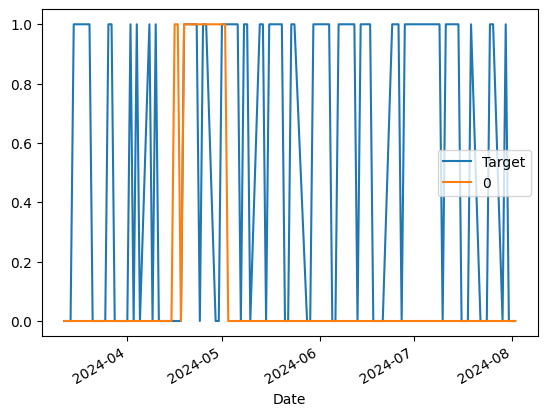

In [ ]:
pred_vs_actual = pd.concat([test.Target, predictions], axis=1)
pred_vs_actual.plot()
None

Orange is our predictions vs blue which is the actual values

We mostly predicted that the market would go down and it seems to have gone up more.

Backtesting System:

Helps us build a more robust way to test our ML bc right now we're only testing across the last 100 days.


In [ ]:
def predict(train, test, features, model):
  model.fit(train[features], train.Target)
  predictions = model.predict(test[features])
  predictions = pd.Series(predictions, index=test.index, name="Predictions")
  pred_vs_actual = pd.concat([test.Target, predictions], axis=1)
  return pred_vs_actual


def backtest(data, model, features, start=2500, step=250):
  """
  Start value - first batch of data to start training the model. Every trading year has 250 days.
  Start - 2500 means take the first 10 years of data to train the model. We will train the model for a year and then go to the next year etc
  """
  all_predictions = []

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i]
    test = data.iloc[i:(i+step)]
    predictions = predict(train, test, features, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)



In [ ]:
predictions = backtest(sp500, model, features)
predictions

,Target,Predictions
Date,,
1999-11-22 00:00:00-05:00,0,0
1999-11-23 00:00:00-05:00,1,0
1999-11-24 00:00:00-05:00,0,0
1999-11-26 00:00:00-05:00,0,0
1999-11-29 00:00:00-05:00,0,0
...,...,...
2024-07-29 00:00:00-04:00,0,0
2024-07-30 00:00:00-04:00,1,0
2024-07-31 00:00:00-04:00,0,0


In [ ]:
predictions["Predictions"].value_counts()

,count
Predictions,
0,3599
1,2614


In [ ]:
precision_score(predictions.Target, predictions.Predictions)

0.5244835501147667

Our model was 52% precise. When it predicted the market would go up it was correct only 52% of the time

In [ ]:
predictions.Target.value_counts()/predictions.shape[0]

,count
Target,
1,0.535168
0,0.464832


53% of the time sp500 actually went up and 46% of the time went down.

Our model preformed worse than what the market did bc our model said to buy only 52% of time but if we bought 53.5% of the time we would have done better

Add more predictors to see if it improves our accuracy to do we will add a variety of rolling averages.

If I was trying to predict if the market was going up I would look at a much longer period than just a day. One month, 5 months, 1 week even to gain insight

In [ ]:
horizons = [2,5,60,250,1000]
#calcualte the mean closing price for the last 2 days, 5 days (trading week), 3 months (60 days), year (250 trading days), and last 4 years (1000 trading days)
#We will the ratio betweens today's closing price and the closing price in these periods
new_features = []
for horizon in horizons:
  rolling_avg = sp500.rolling(horizon).mean()
  ratio_columns = f"Closing_Ratio_{horizon}"
  sp500[ratio_columns] = sp500["Close"]/rolling_avg["Close"]
  trend_column = f"Trend_{horizon}" #lets see the trend in the past x days (horizon) where the price went up
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
  new_features += [ratio_columns, trend_column]

<ipython-input-32-1f47f2f6cd53>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500[ratio_columns] = sp500["Close"]/rolling_avg["Close"]
<ipython-input-32-1f47f2f6cd53>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
<ipython-input-32-1f47f2f6cd53>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [ ]:
sp500.dropna(inplace=True)
sp500

<ipython-input-34-236fca8d9cde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500.dropna(inplace=True)


,Open,High,Low,Close,Volume,Target,Tomorrow,Closing_Ratio_2,Closing_Ratio_5,Closing_Ratio_60,Closing_Ratio_250,Closing_Ratio_1000,Trend_2,Trend_5,Trend_60,Trend_250,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,0,461.839996,0.997157,0.996617,1.000283,1.028047,1.176082,1.0,1.0,32.0,127.0,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,1,463.339996,0.998681,0.995899,0.997329,1.025151,1.172676,0.0,1.0,32.0,126.0,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,1,466.380005,1.001621,0.999495,1.000311,1.028274,1.176163,1.0,2.0,32.0,127.0,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,0,465.850006,1.003270,1.004991,1.006561,1.034781,1.183537,2.0,3.0,32.0,128.0,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,0,465.299988,0.999431,1.003784,1.005120,1.033359,1.181856,1.0,2.0,32.0,128.0,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-26 00:00:00-04:00,5433.669922,5488.319824,5430.700195,5459.100098,3638770000,1,5463.540039,1.005515,0.995983,1.012581,1.121356,1.275539,1.0,2.0,38.0,140.0,529.0
2024-07-29 00:00:00-04:00,5476.549805,5487.740234,5444.439941,5463.540039,3379970000,0,5436.439941,1.000406,1.000475,1.012012,1.121462,1.275940,2.0,2.0,39.0,140.0,529.0
2024-07-30 00:00:00-04:00,5478.729980,5489.459961,5401.700195,5436.439941,3777740000,1,5522.299805,0.997514,0.999881,1.005836,1.115112,1.268992,1.0,2.0,38.0,140.0,528.0


Improving the Model:

In [ ]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

Use 60% bc we want to know more precisily that the price will go up. We don't want to know every instance the price will increase bc we're not trading every day

In [ ]:
def predict(train, test, features, model):
  model.fit(train[features], train.Target)
  predictions = model.predict_proba(test[features])[:,1] #returns a probablity that the row will be a 1 or 0
  predictions[predictions>=.6] = 1 #let use 60% bc it will reduce the number of times our model will predict the price would go up
  predictions[predictions<.6] = 0
  predictions = pd.Series(predictions, index=test.index, name="Predictions")
  pred_vs_actual = pd.concat([test.Target, predictions], axis=1)
  return pred_vs_actual


In [ ]:
predictions = backtest(sp500, model, new_features)
predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,1.0
2003-11-18 00:00:00-05:00,1,1.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,1,1.0
...,...,...
2024-07-26 00:00:00-04:00,1,0.0
2024-07-29 00:00:00-04:00,0,0.0
2024-07-30 00:00:00-04:00,1,0.0


In [ ]:
predictions["Predictions"].value_counts()

,count
Predictions,
0.0,4373
1.0,839


In [ ]:
precision_score(predictions.Target, predictions.Predictions)

0.5744934445768772

In [ ]:
predictions.Target.value_counts()/predictions.shape[0]

,count
Target,
1,0.544896
0,0.455104


Other indicies open before the US market - does this help predict the sp500

We can add in new - interest rates,

Add in key stocks and key sectors to see if Tech influences the sp500

Increase the resolution - check hourly data